In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('review_usa.csv')

In [2]:
print(data.shape)
print(data.columns)

(12572, 12)
Index(['ReviewerID', 'Review', 'splited_sentence', 'cleaned_sentence',
       'detect_language', 'sentiment_result', 'negative', 'neutral',
       'positive', 'Review Score', 'Review date', 'Review Like'],
      dtype='object')


In [3]:
data['cleaned_sentence']
df = data['cleaned_sentence']

In [4]:
import re
import nltk

In [5]:
## 일단 이름이 너무 이상해서바꾸는 함수 만들기
import pandas as pd
import re
import emoji

# Define the substitution patterns
substitutions = {
    r'robot de Niro': 'Deniro',
    r'De nitro': 'Deniro',
    r'DeNiro': 'Deniro',
    r'robot De nitro': 'Deniro',
    r'robot de nitro': 'Deniro',
    r'robot desire': 'Deniro',
    r'hatchway\'s': 'Hathaway',
    r'anna pathway': 'Hathaway',
    r'pathway': 'Hathaway',
    r'Nancy Meyers': 'Nancy meter',
    r'desire and pathway': 'Deniro and Hathaway',
    r'anna and robot': 'Deniro and Hathaway',
    r':':','

}




In [6]:
df = pd.DataFrame(df)
df


,cleaned_sentence
0,Wasn't what I expected.
1,Really enjoyed it.
2,Including the hope for redemption at the end.
3,A true feel good movie that I wish I saw in th...
4,anna pathway and robot desire have great chemi...
...,...
12567,This movie is a must see!
12568,There is no doubt in my mind that I will be wa...
12569,Overall I would consider the plot and story li...
12570,"The popular film director, producer and screen..."


In [7]:
# Define a function to apply substitutions to a single sentence
def replace_text(text):
    if isinstance(text, str):  # Check if the input is a string
        for pattern, replacement in substitutions.items():
            text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
        return text


# Apply the substitutions and remove emojis
df['cleaned_sentence'] = df['cleaned_sentence'].apply(replace_text)

# Display the updated DataFrame
print(df['cleaned_sentence'])

0                                  Wasn't what I expected.
1                                       Really enjoyed it.
2            Including the hope for redemption at the end.
3        A true feel good movie that I wish I saw in th...
4        Hathaway and Deniro have great chemistry and t...
                               ...                        
12567                            This movie is a must see!
12568    There is no doubt in my mind that I will be wa...
12569    Overall I would consider the plot and story li...
12570    The popular film director, producer and screen...
12571        I hope you enjoy The Intern as much as I did.
Name: cleaned_sentence, Length: 12572, dtype: object


In [8]:
## 피처 벡터화

from nltk.stem import WordNetLemmatizer
import nltk
import string
lemmar = WordNetLemmatizer()

#토큰 lemmatize 해서 정규화하기
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

#구두점 제거하기
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

#특수 문자 제거 및 단어 원형 추출!!

def LemNormalize(text):
    text_new = text.lower().translate(remove_punct_dict) #텍스트 소문자 변경 후 특수 문자 제거하기
    
    word_tokens = nltk.word_tokenize(text_new)  #단어로 토큰화
    
    return LemTokens(word_tokens) #단어 원형 추출
    



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), 
                             tokenizer = LemNormalize, min_df=0.05, max_df=0.85)


In [10]:
cleaned_sentences = df['cleaned_sentence'].apply(lambda x: str(x) if isinstance(x, (str, bytes)) else '')

In [11]:
cleaned_sentences

0                                  Wasn't what I expected.
1                                       Really enjoyed it.
2            Including the hope for redemption at the end.
3        A true feel good movie that I wish I saw in th...
4        Hathaway and Deniro have great chemistry and t...
                               ...                        
12567                            This movie is a must see!
12568    There is no doubt in my mind that I will be wa...
12569    Overall I would consider the plot and story li...
12570    The popular film director, producer and screen...
12571        I hope you enjoy The Intern as much as I did.
Name: cleaned_sentence, Length: 12572, dtype: object

In [12]:
# 이모지 제거하는 함수
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

cleaned_sentences = cleaned_sentences.apply(remove_emoji)

In [13]:
## 문자열이 아닌 행이 여전히 있나

non_string_rows = cleaned_sentences.loc[~cleaned_sentences.apply(lambda x: isinstance(x, str))]
print(len(non_string_rows))  #없다. 


0


In [14]:
feature_vect = tfidf_vect.fit_transform(cleaned_sentences)

c:\python\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\python\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


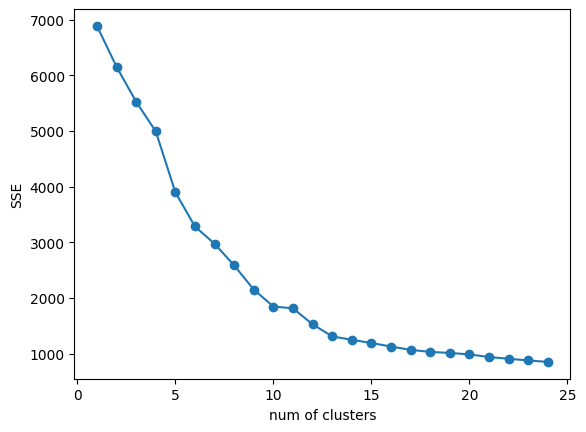

In [16]:
## 최적의 클러스터 개수 찾기
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def elbow(X):
    sse = []
    for i in range(1,25):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,25), sse, marker='o')
    plt.xlabel('num of clusters')
    plt.ylabel('SSE')
    plt.show()

elbow(feature_vect)

In [17]:
# KMeans: 20
km_cluster = KMeans(n_clusters=20, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster 및 중심 좌표 정보
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# cluster 라벨 추가
df['cleaned_sentence'] = cleaned_sentences
df['cluster_label'] = cluster_label